In [1]:
# IMPORT MODULE & CONNCECTION ESTABLISHMENT 

import psycopg2
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from getpass import getpass
import warnings
warnings.filterwarnings('ignore')

conn = psycopg2.connect(
    host="localhost",
    database="dip editing2",
    user="postgres",
    password="HardikPostgreSQL")

cursor = conn.cursor()

In [2]:
# ITEM BLOCK #

def edit_item():
    try:
        df = pd.read_sql("SELECT*FROM item ORDER BY item_id;", conn)
        print(tabulate(df,headers="keys", tablefmt="psql", showindex=False))

        item_id = int(input("Enter Item ID: "))
        q = f"SELECT*FROM item WHERE item_id = {item_id};"
        cursor.execute(q)
        if cursor.fetchone():
            item_name = input("Enter Item Name: ")
            supplier_id = int(input("Enter Supplier ID: "))
            cursor.execute(f"UPDATE item SET item_name = '{item_name}', supplier_id = {supplier_id} WHERE item_id = {item_id};")
            conn.commit()
            print("Item Information Updated")
        else:
            print("Oops! Item Not Found")
    except:
        print("Oops! Enter Right Option Or Correct Details")
        
def edit_rate():
    try:
        df = pd.read_sql("SELECT*FROM item ORDER BY item_id;", conn)
        print(tabulate(df,headers="keys", tablefmt="psql", showindex=False))

        item_id = int(input("Enter Item ID: "))
        q = f"SELECT*FROM item WHERE item_id = {item_id};"
        cursor.execute(q)
        if cursor.fetchone():
            purchase_rate = int(input("Enter Purchase Rate: "))   
            sale_rate = int(input("Enter Sale Rate: "))            
            cursor.execute(f"UPDATE item SET purchase_rate = {purchase_rate}, sale_rate = {sale_rate} WHERE item_id = {item_id};")
            conn.commit()
            print("Rate Successfully Updated")
        else:
            print("Oops! Item Not Found")
    except:
        print("Oops! Enter Right Option Or Correct Details")    

def search_item():
    try:
        while(True):
            print("Enter Choice\n1. By Item ID \n2. By Item Name\n3. Exit")
            ch = int(input("Enter Choice: "))
            if ch==1:            
                item_id = int(input("Enter Item ID: "))
                q = f"SELECT*FROM item WHERE item_id = {item_id};"
                cursor.execute(q)
                if cursor.fetchone():
                    df = pd.read_sql(q, conn)
                    print(tabulate(df, headers = "keys", tablefmt = "psql", showindex = False))
                else:
                    print("Oops! Item Not Found")
            if ch==2:
                item_name = input("Enter Item Name: ")
                q = f"SELECT*FROM item WHERE item_name ILIKE '%{item_name}%';"
                cursor.execute(q)
                if cursor.fetchall():
                    df = pd.read_sql(q, conn)
                    print(tabulate(df, headers = "keys", tablefmt = "psql", showindex = False))
                else:
                    print("Oops! Item Not Found")
            elif ch==3:
                break  
    except:
        print("Oops! Enter Right Option Or Correct Details")        
        
def delete_item():
    try:
        df = pd.read_sql("SELECT*FROM item ORDER BY item_id;", conn)
        print(tabulate(df,headers="keys", tablefmt="psql", showindex=False))

        item_id = int(input("Enter Item ID: "))
        q = f"SELECT*FROM item WHERE item_id = {item_id};"
        cursor.execute(q)
        if cursor.fetchone():   
            cursor.execute(f"DELETE FROM item WHERE item_id = {item_id};")
            conn.commit()
            print("Item Successfully Removed")
        else:
            print("Oops! Item Not Found")
    except:
        print("Oops! Enter Right Option Or Correct Details")      

In [3]:
# CUSTOMER BLOCK #       
        
def add_customer():
    try:        
        df = pd.read_sql("SELECT*FROM customer ORDER BY customer_id;", conn)
        print(tabulate(df, headers = "keys", tablefmt = "psql", showindex=False))
        
        q = "SELECT max(customer_id) AS largest FROM customer;"
        cursor.execute(q)
        r = cursor.fetchone()[0]
        if r:
            customer_id = r+1
        else:
            customer_id = 1     
        customer_name = input("Enter Customer Name: ")
        customer_address = input("Enter Customer Address: ")
        mobile_no = input("Enter Customer Mobile No: ")    
        q = f"INSERT INTO customer(customer_id,customer_name,customer_address,mobile_no) VALUES ({customer_id},'{customer_name}','{customer_address}','{mobile_no}');"
        cursor.execute(q)
        conn.commit()
        print("Wooh! Customer Information Successfully Added.")
    except:  
        print("Oops! Enter Right Option Or Correct Details")   

        
def edit_customer():
    try:
        df = pd.read_sql("SELECT*FROM customer ORDER BY customer_id;", conn)
        print(tabulate(df,headers="keys", tablefmt="psql", showindex=False))

        customer_id = int(input("Enter Customer ID: "))
        q = f"SELECT*FROM customer WHERE customer_id = {customer_id};"
        cursor.execute(q)
        if cursor.fetchone():
            customer_name = input("Enter Customer Name: ")
            customer_address = input("Enter Customer Address: ")
            mobile_no = input("Enter Customer Mobile No: ")
            cursor.execute(f"UPDATE customer SET customer_name = '{customer_name}', customer_address = '{customer_address}', mobile_no = '{mobile_no}' WHERE customer_id = {customer_id};")
            conn.commit()
            print("Customer Information Edited")
        else:
            print("Oops! Customer Information Not Found.")    
    except:
        print("Oops! Enter Right Option Or Correct Details")
        
def search_customer():
    try:
        while(True):
                print("Enter Choice\n1. By Customer ID \n2. By Customer Name\n3. Exit")
                ch = int(input("Enter Choice: "))
                if ch==1:            
                    customer_id = int(input("Enter Customer ID: "))
                    q = f"SELECT*FROM customer WHERE customer_id  = {customer_id} ORDER BY customer_id;"
                    cursor.execute(q)
                    if cursor.fetchone():
                        df = pd.read_sql(q, conn)
                        print(tabulate(df, headers = "keys", tablefmt = "psql", showindex = False))
                    else:
                        print("Oops! Customer Not Found")
                if ch==2:
                    customer_name = input("Enter Customer Name: ")
                    q = f"SELECT*FROM customer WHERE customer_name ILIKE '%{customer_name}%' ORDER BY customer_id;"
                    cursor.execute(q)
                    if cursor.fetchall():
                        df = pd.read_sql(q, conn)
                        print(tabulate(df, headers = "keys", tablefmt = "psql", showindex = False))
                    else:
                        print("Oops! Customer Not Found")
                elif ch==3:
                    break
    except:
        print("Oops! Enter Right Option Or Correct Details")   

def delete_customer():
    try:
        df = pd.read_sql("SELECT*FROM customer ORDER BY customer_id;", conn)
        print(tabulate(df,headers="keys", tablefmt="psql", showindex=False))
        
        customer_id = int(input("Enter Customer ID: "))
        q = f"SELECT*FROM customer WHERE customer_id = {customer_id} ORDER BY customer_id;"
        cursor.execute(q)
        if cursor.fetchone():   
            cursor.execute(f"DELETE FROM customer WHERE customer_id = {customer_id};")
            conn.commit()
            print("Customer Information Successfully Removed")
        else:
            print("Oops! Customer Not Found.")  
    except:
        print("Oops! Enter Right Details Or Correct Details")         


In [4]:
# SUPPLIER BLOCK #        
        
def add_supplier():
    try:
        q = "SELECT MAX(supplier_id) AS largest FROM supplier;"
        cursor.execute(q)
        r = cursor.fetchone()[0]
        if r:
            supplier_id = r+1
        else:
            supplier_id = 1   
        supplier_name = input("Enter Supplier Name: ")
        supplier_address = input("Enter Supplier Address: ")
        mobile_no = input("Enter Supplier Mobile No: ")
        q1= f"INSERT INTO supplier(supplier_id,supplier_name,supplier_address,mobile_no) VALUES ({supplier_id},'{supplier_name}','{supplier_address}','{mobile_no}');"
        cursor.execute(q1)
        conn.commit()
        print("Wooh! Supplier Successfully Added.")
    except:
        print("Oops! Enter Right Option Or Correct Details")     

def edit_supplier():
    try:
        df = pd.read_sql("SELECT*FROM supplier ORDER BY supplier_id;", conn)
        print(tabulate(df,headers="keys", tablefmt="psql", showindex=False))

        supplier_id = int(input("Enter Supplier ID: "))
        q = f"SELECT*FROM supplier WHERE supplier_id = {supplier_id};"
        cursor.execute(q)
        if cursor.fetchone():
            supplier_name = input("Enter Supplier Name: ")
            supplier_address = input("Enter Supplier Address: ")
            mobile_no = input("Enter Supplier Mobile No: ")
            cursor.execute(f"UPDATE supplier SET supplier_name = '{supplier_name}', supplier_address = '{supplier_address}', mobile_no = '{mobile_no}' WHERE supplier_id = {supplier_id};")
            conn.commit()
            print("Supplier Information Updated")
        else:
            print("Oops! Supplier Information Not Found.") 
    except:
        print("Oops! Enter Right Option Or Correct Details")   
              
def search_supplier():
    try:
         while(True):
                print("Enter Choice\n1. By Supplier ID\n2. By Supplier Name\n3. Exit")
                ch = int(input("Enter Choice: "))
                if ch==1:            
                    supplier_id = int(input("Enter Supplier ID: "))
                    q = f"SELECT*FROM supplier WHERE supplier_id = {supplier_id} ORDER BY supplier_id;"
                    cursor.execute(q)
                    if cursor.fetchone():
                        df = pd.read_sql(q, conn)
                        print(tabulate(df, headers = "keys", tablefmt = "psql", showindex = False))
                    else:
                        print("Oops! Supplier Not Found")
                if ch==2:
                    supplier_name = input("Enter Supplier Name: ")
                    q = "SELECT*FROM supplier WHERE supplier_name ILIKE '%{}%' ORDER BY supplier_id;".format(supplier_name)
                    cursor.execute(q)
                    if cursor.fetchall():
                        df = pd.read_sql(q, conn)
                        print(tabulate(df, headers = "keys", tablefmt = "psql", showindex = False))
                    else:
                        print("Oops! Supplier Not Found")
                elif ch==3:
                    break
    except:
        print("Oops! Enter Right Option Or Correct Details")      
        
def delete_supplier():
    try:
        df = pd.read_sql("SELECT*FROM supplier ORDER BY supplier_id;", conn)
        print(tabulate(df,headers="keys", tablefmt="psql", showindex=False))

        supplier_id = int(input("Enter Supplier ID: "))
        q = f"SELECT*FROM supplier WHERE supplier_id = {supplier_id};"
        cursor.execute(q)
        if cursor.fetchone():   
            cursor.execute(f"DELETE FROM supplier WHERE supplier_id = {supplier_id};")
            conn.commit()
            print("Supplier Information Successfully Removed")
        else:
            print("Oops! Supplier Not Found")
    except:
        print("Oops! Enter Right Option Or Correct Details")    

In [5]:
# TRANSACTIONS BLOCK #        
        
def sale():
    try:
        total_amount=0
        ch='Y'
        sale_date = input("Enter Sale Date(YYYY-MM-DD): ")
        df = pd.read_sql("SELECT*FROM customer ORDER BY customer_id;", conn)
        print(tabulate(df,headers="keys", tablefmt="psql", showindex=False))

        customer_id = int(input("Enter Customer ID: "))  
        
        cursor.execute(f"SELECT*FROM customer WHERE customer_id={customer_id} ORDER BY customer_id;")
        b1 = cursor.fetchone()
        if b1 :
            customer_name = b1[1]
            print("Sale Details")
            ff =pd.read_sql("""SELECT item.item_id, item.supplier_id, item.item_name, item.purchase_rate, item.sale_rate, item.qoh FROM supplier INNER JOIN item ON 
              item.supplier_id = supplier.supplier_id ORDER BY item.item_id""", conn)     
            print(tabulate(ff,headers="keys", tablefmt="psql", showindex=False))
            
            while (ch=='Y'):
                item_id = int(input("Enter Item ID: "))
                cursor.execute("SELECT*FROM item WHERE item_id = {} ORDER BY item_id;".format(item_id))
                r1 = cursor.fetchone()
                
                if r1:
                    aqty = r1[5]
                    seller_id = r1[1]
                    qty = int(input("Enter Quantity: "))
                    
                    if qty <= aqty:
                        sale_rate = r1[4]
                        supplierid = r1[1]
                        item_name = r1[2]
                        cursor.execute(f"SELECT*FROM supplier WHERE supplier_id = {supplierid};")
                        d1 = cursor.fetchone()
                        suppliername = d1[1]                       
                        uqty = aqty - qty
                        total_amount = qty * sale_rate
                        q2 = f"INSERT INTO smaster(item_id,customer_id,item_name,customer_name,supplier_name,sale_date,quantity,total_amount) VALUES ({item_id},{customer_id},'{item_name}','{customer_name}','{suppliername}','{sale_date}',{qty},{total_amount});"
                        cursor.execute(q2)
                        conn.commit() 
                        cursor.execute(f"UPDATE item SET qoh = {uqty} WHERE item_id = {item_id};")
                        conn.commit()
                        print("Wooh! Item Sold")
                        
                        ch = input("Hey, Do you wish to sold more Items(Y/N): ")
                    else: 
                        print("Item Stock is Not Suffiecient")
                else: 
                    print("Oops! Item Not Found")    
        else: 
            print("Oops! Customer Not Found")
            y = input("Do You Want To Add Customer(Y/N): ")
            if (y=="Y"):
                add_customer() 
            else:
                pass
    except:
          print("Oops! Enter Right Option Or Correct Details")
        
def purchase():
    try:
        total = 0
        ch='Y'
        purchase_date = input("Enter Purchase Date(YYYY-MM-DD): ")
        
        df = pd.read_sql("SELECT*FROM supplier ORDER BY supplier_id;", conn)
        print(tabulate(df,headers="keys", tablefmt="psql", showindex=False))  
        
        supplier_id = int(input("Enter Supplier ID: "))
        cursor.execute(f"SELECT*FROM supplier WHERE supplier_id={supplier_id} ORDER BY supplier_id;")
        if cursor.fetchone():
            print("Purchase Details")
            while (ch=='Y'):
                q = pd.read_sql(f"SELECT*FROM item WHERE supplier_id ={supplier_id} ORDER BY item_id;",conn)   
                print(tabulate(q,headers="keys", tablefmt="psql", showindex=False))               
                litem = "SELECT MAX(item_id) FROM item;"
                cursor.execute(litem)
                litemno = cursor.fetchone()[0]
                print("Last Listed Item ID: ", litemno)
                item_id = int(input("Enter Item ID: "))
                cursor.execute(f"SELECT*FROM item WHERE item_id = {item_id};")
                r1 = cursor.fetchone()
                if r1:
                        q  = f"SELECT*FROM item WHERE item_id = {item_id} ORDER BY item_id;"
                        cursor.execute(q)
                        d12 = cursor.fetchone()
                        qty1 = d12[5]
                        sid = d12[1]
                        itemname = d12[2]
                        qty = int(input("Enter Quantity: "))
                        uqty = qty + qty1
                        purchase_rate = int(input("Enter Purchase Rate: "))
                        sale_rate = int(input("Enter Sale Rate: "))
                        q4 = cursor.execute(f"SELECT*FROM supplier WHERE supplier_id = {sid};")
                        suppliername = cursor.fetchone()[1]                   
                        cursor.execute(f"UPDATE item SET purchase_rate = {purchase_rate}, sale_rate = {sale_rate}, qoh = {uqty} WHERE item_id = {item_id};")
                        conn.commit()
                        total_amount = qty * purchase_rate

                        q2 = f"INSERT INTO pmaster(item_id,supplier_id,purchase_date,item_name,supplier_name,quantity,total_amount) VALUES ({item_id},{supplier_id},'{purchase_date}','{itemname}','{suppliername}',{qty},{total_amount});"
                        cursor.execute(q2)
                        conn.commit()
                        
                        print("Wooh! Item Purchased & Added")
                        ch = input("Hey, Do you wish to add more Items? (Y/N): ")               
                else: 
                        print("Oops! Item Not Found Please Add Item")
                        ch = input("Hey, Do you want to list items? (Y/N): ")      

                        if ch =='Y':
                            supplier_id = int(input("Enter Supplier ID: "))
                            cursor.execute(f"SELECT*FROM supplier WHERE supplier_id = {supplier_id};")
                            d2 = cursor.fetchone()
                            suppliername = d2[1]
                            q = pd.read_sql(f"SELECT*FROM item WHERE supplier_id ={supplier_id} ORDER BY item_id;",conn)   
                            print(tabulate(q,headers="keys", tablefmt="psql", showindex=False))  
                            item_name = input("Enter Item Name: ")
                            purchase_rate = float(input("Enter Purchase Rate: "))
                            sale_rate = float(input("Enter Sale Rate: "))
                            qty = int(input("Enter Qty On Hand: "))
                            q = f"INSERT INTO item(supplier_id,item_name,purchase_rate,sale_rate,qoh) VALUES ({supplier_id},'{item_name}',{purchase_rate},{sale_rate},{qty});"
                            cursor.execute(q)
                            conn.commit()                            
                            print("Wooh! Item Successfully Added")
                            total_amount = qty * purchase_rate  
                            q2 = f"INSERT INTO pmaster(item_id,supplier_id,purchase_date,item_name,supplier_name,quantity,total_amount) VALUES ({item_id},{supplier_id},'{purchase_date}','{item_name}','{suppliername}',{qty},{total_amount});"
                            cursor.execute(q2)
                            conn.commit()
                            ch = input("Hey, Do you wish to add more Items(Y/N): ")    
                        else: 
                            pass

        else:
            print("Oops! Supplier Not Found. Do You Want To Add Supplier?") 
            y = input("Do You Want To Add Supplier? (Y/N): ")
            if (y=="Y"):
                add_supplier() 
            else:
                pass
    except:
        print("Oops! Enter Right Option Or Correct Details")                 

In [6]:
# REPORT BLOCK #        
                
def show_sale():
    try: 
        bdate = input("Enter Start Date(YYYY-MM-DD): ")
        edate = input("Enter End Date(YYYY-MM-DD): ")
        df = pd.read_sql(f"SELECT item_name,customer_name,supplier_name,quantity,total_amount FROM smaster WHERE sale_date BETWEEN '{bdate}' AND '{edate}'",conn)
        print(tabulate(df, headers = "keys", tablefmt = 'psql', showindex = False))
    except:
        print("Oops! Enter Right Option Or Correct Details")  

def show_purchase():
    try:
        bdate = input("Enter Start Date(YYYY-MM-DD): ")
        edate = input("Enter End Date(YYYY-MM-DD): ")
        df = pd.read_sql(f"SELECT item_name, supplier_name, quantity, total_amount FROM pmaster WHERE purchase_date BETWEEN '{bdate}' AND '{edate}'",conn)
        print(tabulate(df, headers = "keys", tablefmt = 'psql', showindex = False))
    except:
        print("Oops! Enter Right Option Or Correct Details")         
        
def show_item():
        df = pd.read_sql("SELECT*FROM item ORDER BY item_id;", conn)
        print(tabulate(df, headers = "keys", tablefmt = "psql", showindex=False))
        
def show_customer():
        df = pd.read_sql("SELECT*FROM customer ORDER BY customer_id;", conn)
        print(tabulate(df, headers = "keys", tablefmt = "psql", showindex=False)) 

def show_supplier():
        df = pd.read_sql("SELECT*FROM supplier ORDER BY supplier_id;", conn)
        print(tabulate(df, headers = "keys", tablefmt = "psql", showindex=False))  
        
def best_product():
    try:
        s=input("Enter Start Date(YYYY-MM-DD): ")
        e=input("Enter End Date(YYYY-MM-DD): ")
        c = f"SELECT item_id,item_name, SUM(quantity) as total_quantity FROM smaster WHERE sale_date BETWEEN '{s}' AND '{e}' GROUP BY item_id,item_name;"
        df=pd.read_sql(c,conn)
        print(tabulate(df, headers='keys', tablefmt = 'psql', showindex=False))
        plt.bar(df.item_id,df.total_quantity)
        plt.xlabel("Item ID")
        plt.ylabel("Qty")
        plt.title("Best Selling Product")
        plt.xticks(df.item_id)
        plt.show()
    except:
        print("Oops! Enter Right Option Or Correct Details")  

def sale_performance():
    try:
        y=input("Enter Year(YYYY): ")
        q =f"SELECT EXTRACT (MONTH FROM sale_date) as month, SUM(total_amount) as total_amount from smaster WHERE EXTRACT(YEAR FROM sale_date) = {y} GROUP BY Month";
        df = pd.read_sql(q,conn)
        print(tabulate(df, headers='keys', tablefmt = 'psql', showindex=False))
    except:
        print("Oops! Enter Right Option Or Correct Details")
        
        
def top_customer():
    try:
        bdate = input("Enter Start Date(YYYY-MM-DD): ")
        edate = input("Enter End Date(YYYY-MM-DD): ")
        df = pd.read_sql(f"SELECT customer_name AS Customer_Name, SUM(quantity) AS Total_Qty, SUM(total_amount) AS Total_Amount FROM smaster WHERE sale_date BETWEEN '{bdate}' AND '{edate}' GROUP BY customer_name ORDER BY SUM(total_amount) DESC LIMIT 5",conn)
        print(tabulate(df, headers = "keys", tablefmt = 'psql', showindex = False))
    except:
        print("Oops! Enter Right Option Or Correct Details")
        
def top_supplier():
    try:
        bdate = input("Enter Start Date(YYYY-MM-DD): ")
        edate = input("Enter End Date(YYYY-MM-DD): ")
        df = pd.read_sql(f"SELECT supplier_name AS Supplier_Name, SUM(quantity) AS Total_Qty, SUM(total_amount) AS Total_Amount FROM pmaster WHERE purchase_date BETWEEN '{bdate}' AND '{edate}' GROUP BY supplier_name ORDER BY SUM(total_amount) DESC LIMIT 5",conn)
        print(tabulate(df, headers = "keys", tablefmt = 'psql', showindex = False))
    except:
        print("Oops! Enter Right Option Or Correct Details")    
        
        
def overall():
    try:
        bdate = input("Enter Start Date(YYYY-MM-DD): ")
        edate = input("Enter End Date(YYYY-MM-DD): ")
        while(True):
            print("Enter Choice\n1. By Customer Wise \n2. By Supplier Wise \n3. Exit")
            ch = int(input("Enter Choice: "))
            if ch==1:
                    df = pd.read_sql(f"SELECT customer_name AS Customer_Name, SUM(quantity) AS Total_Qty, SUM(total_amount) AS Total_Amount FROM smaster WHERE sale_date BETWEEN '{bdate}' AND '{edate}' GROUP BY customer_name ORDER BY SUM(total_amount)",conn)
                    print(tabulate(df, headers = "keys", tablefmt = 'psql', showindex = False))
            elif ch==2:
                    df = pd.read_sql(f"SELECT supplier_name AS Supplier_Name, SUM(quantity) AS Total_Qty, SUM(total_amount) AS Total_Amount FROM smaster WHERE sale_date BETWEEN '{bdate}' AND '{edate}' GROUP BY supplier_name ORDER BY SUM(total_amount)",conn)
                    print(tabulate(df, headers = "keys", tablefmt = 'psql', showindex = False))
            elif ch==3:
                    break    
    except:    
        print("Oops! Enter Right Option Or Correct Details") 
        
def resetcredentials():
    cursor.execute("SELECT*FROM logindata WHERE id = 1;")
    r1 = cursor.fetchone()
    usernameorg = r1[1]
    passwordorg = r1[2]
    username = input("Enter Old Username: ")
    password = getpass("Enter Old Password: ")
    if (usernameorg == username) & (passwordorg == password):
        username = input("Enter New Username: ")
        password = getpass("Enter New Password: ")
        q = f"UPDATE logindata SET username = '{username}', password = '{password}' WHERE id = 1;"
        cursor.execute(q)
        conn.commit()
        print('Login Credentials Changed')
    else:
        print('Wrong Credentials')                

Enter Username: dipo
Enter Password: ········
                                   -->>INVENOTRY MANAGEMENT SYSTEM<<--
---------------------------------------------Enter Your Choice---------------------------------------------------------------
                                                    1. Items
                                                    2. Customers
                                                    3. Suppliers
                                                    4. Transactions
                                                    5. Report
                                                    6. Exit
Enter Your Choice No: 4
------------------------------------------------Enter Your Choice-----------------------------------------------------------
                                                      1. Sale Item
                                                      2. Purchase Item
                                                      3. Exit
Enter Your Choice No: 2
Ent

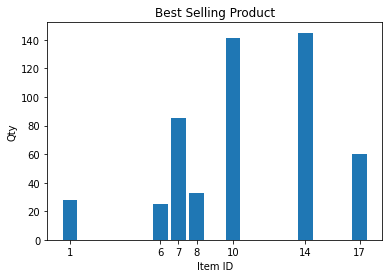

-------------------------------------------------Enter Your Choice----------------------------------------------------------
                                                    1. Item Details
                                                    2. Customer Deatils
                                                    3. Supplier Details
                                                    4. Sale Report
                                                    5. Purchase Report
                                                    6. Best Selling Product
                                                    7. Yearly Sale Perfomance
                                                    8. Top Customer
                                                    9. Top Supplier
                                                    10. Overall Report
                                                    11. Reset Login Credentials
                                                    12. Exit
Enter Your Choice No: 7

In [7]:
# PROGRAMME #


cursor.execute("SELECT*FROM logindata WHERE id = 1;")
r1 = cursor.fetchone()
usernameorg = r1[1]
passwordorg = r1[2]
username = input("Enter Username: ")
password = getpass("Enter Password: ")
if (usernameorg == username) & (passwordorg == password):
    print("{:>70}".format("-->>INVENOTRY MANAGEMENT SYSTEM<<--"))
    while(True):
        try:

                print("""---------------------------------------------Enter Your Choice---------------------------------------------------------------
                                                    1. Items
                                                    2. Customers
                                                    3. Suppliers
                                                    4. Transactions
                                                    5. Report
                                                    6. Exit""")
                ch=int(input("Enter Your Choice No: "))
                if ch==1:
                    while(True):
                        print("""----------------------------------------Enter Your Choice---------------------------------------------------------------
                                                    1. Edit Item
                                                    2. Fix Rate
                                                    3. Search Item
                                                    4. Delete Item
                                                    5. Exit""")
                        ch=int(input("Enter Your Choice No: "))
                        if ch==1:
                         edit_item()
                        elif ch==2:
                         edit_rate()
                        elif ch==3:
                         search_item()
                        elif ch==4:
                         delete_item()
                        elif ch==5:
                          break 

                elif ch==2:
                    while(True):
                        print("""----------------------------------------------Enter Your Choice--------------------------------------------------------------
                                                    1. Add New Customer
                                                    2. Edit Customer
                                                    3. Search Customer
                                                    4. Delete Customer
                                                    5. Exit""")
                        ch=int(input("Enter Your Choice No: "))
                        if ch==1:
                         add_customer()
                        elif ch==2:
                         edit_customer()
                        elif ch==3:
                         search_customer()
                        elif ch==4:
                         delete_customer()
                        elif ch==5:
                          break 

                elif ch==3:
                    while(True):
                        print("""-----------------------------------------------Enter Your Choice--------------------------------------------------------------
                                                     1. Add New Supplier
                                                     2. Edit Supplier
                                                     3. Search Supplier
                                                     4. Delete Supplier
                                                     5. Exit""")
                        ch=int(input("Enter Your Choice No: "))
                        if ch==1:
                         add_supplier()
                        elif ch==2:
                         edit_supplier()
                        elif ch==3:
                         search_supplier()
                        elif ch==4:
                         delete_supplier()
                        elif ch==5:
                          break   

                elif ch==4:
                    while(True):
                        print("""------------------------------------------------Enter Your Choice-----------------------------------------------------------
                                                      1. Sale Item
                                                      2. Purchase Item
                                                      3. Exit""")
                        ch=int(input("Enter Your Choice No: "))
                        if ch==1:
                         sale()
                        elif ch==2:
                         purchase()
                        elif ch==3:
                          break    

                elif ch==5:
                    while(True):
                        print("""-------------------------------------------------Enter Your Choice----------------------------------------------------------
                                                    1. Item Details
                                                    2. Customer Deatils
                                                    3. Supplier Details
                                                    4. Sale Report
                                                    5. Purchase Report
                                                    6. Best Selling Product
                                                    7. Yearly Sale Perfomance
                                                    8. Top Customer
                                                    9. Top Supplier
                                                    10. Overall Report
                                                    11. Reset Login Credentials
                                                    12. Exit""")
                        ch=int(input("Enter Your Choice No: "))
                        if ch==1:
                         show_item()
                        elif ch==2:
                         show_customer()
                        elif ch==3:
                         show_supplier()
                        elif ch==4:
                         show_sale()
                        elif ch==5:
                         show_purchase()
                        elif ch==6:
                         best_product()
                        elif ch==7:
                         sale_performance()
                        elif ch==8:
                         top_customer()
                        elif ch==9:
                         top_supplier()
                        elif ch==10:
                          overall()
                        elif ch==11:
                          resetcredentials() 
                        elif ch==12:
                           break 

                elif ch==6:
                    print("{:>65}".format("-->> THANK YOU <<--"))    
                    break
                    
        except:
                print("Choose Right Option OR Enter Details")                    
else:
    print("Wrong Credentials")

